# 1DAY - 2021.02.15


## 하단에 지속적으로 연결하여 과제 진행하였습니다.

### 프로젝트 사전 준비과정

월 
 * 데이터 종류 : [회귀] 자전거 수요 예측 
 * 유명했던 캐글 데이터를 직접 분석하여 기초적인 EDA 및 분석 방법을 터득한다.   
 * 또한, 최대한 타겟과의 많은 시각화를 해봄므로 시각화에 익숙해지고자 한다.   
  
화  
 * 데이터 종류 : [분류] 승리여부 
 * 담당자의 흥미를 유발하기 위해 좋아하는 LOL 게임 데이터를 활용하여 분석해본다. 
   
수 - 아무리 고민을 해봐도 주택가격 예측은 너무 좋은 예로 사료되어 진지하게 EDA 및 분석을 진행하고자 한다.  
목 - 미정  
금 - 미정  
  
### 프로젝트 준비 과정 
  * 미정  

## 해당 과제를 하면서 배운 점 
  
###  1. train과 test 데이터에 컬럼을 반드시 확인하여야 한다. 
###  2. 한쪽에 편중된 데이터는 의심하고 imputer처리를 해야한다. 
###  3. 상관관계가 너무 높은 것들에 대해서는 의심을 해야한다. 
###  4. 중복된 feature가 있는지 반드시 확인해야 한다. 
###  5. 타겟 데이터의 편중이 있다면, log를 취해주어야 한다.

### 1) 타겟으로 사용할 특성을 선택합니다.

자전거 대여량 수 

### 2) 풀고자 하는 문제가 분류/회귀 문제인지 정합니다.

회귀문제

 #### * 개요   
  -. 저는 DS.ltd를 운영하고 있는 데이터사이언스 입니다.   
  -. 제가 주로 운동하는 코스에는 점점 자전거 대여 및 자전거 관련 시설이   
     증가하는 것을 관측하여 자전거 관련하여 예산 투자가 많이 이루어지고   
     있다는 사실을 인지하였다.    
  
  -. 어느 날 자치도에서 각 시군별 자전거 관련하여 감사 및 적절성 평가를  
     진행한다는 공문이 내려졌습니다.   
  -. 이에, 시,군,동별 자전거 담당자는 DS.ltd에 급히 자전거분석을 요청하였습니다.   
    
  
 #### * 요청상세내역   
  -. 현행되고 있는 "자전거 활성화 사업"은 외국의 사업모델을 밴치마킹하였습니다.   
  -. 이에, 해외 사업모델을 기준으로 감사가 이루어질 예정입니다.   
  -. 감사의 주된 목표는 과거 분석을 기반으로 예측이   
     얼마나 적중하였는가 최종포인트입니다.   
     
  -. 이에, 해외 자전거 수요 분석을 중점적으로 분석하여 월별, 주말별 예측이   
     얼마나 적중하였는지 확인하고자 합니다.   
       
         
  **-. 여기서 검증데이터는 공공 데이터포털에 업로드된   
     서울시 2019.06~2019.12까지의 데이터를 사용하여 체크토록 하겠습니다.**   

해당 데이터가 어떤식으로 구성되어 있는지 feature은 어떤 특성이  
있는지를 먼저 살펴보도록 하겠습니다. 

datetime - 일자와 시간으로 구성된 데이터   
season - 계절별 데이터 (1 = spring, 2 = summer, 3 = fall, 4 = winter)   
holiday - 공휴일이면 1, 아니면 0  
workingday - 일하는 일자면 1, 아니면 0  
weather  
  * 1: Clear, Few clouds, Partly cloudy, Partly cloudy  
  * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
  * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
  * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog   
temp - 실제온도 
atemp - 체감온도
humidity - relative humidity  
windspeed - wind speed  
casual - 등록하지 않고 단순 대여하는 사람  
registered - 등록 후 지속적으로 대여하는 사람 
count - 대여수 ( 타겟 정보 )   


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 노트북 안에 그래프를 그리기 위해 
%matplotlib inline

# 그래프 스타일 지정 
plt.style.use("ggplot")

# 그래프에서 마이너스 폰트 깨지는 문제를 방지하기 위한 코드 
plt.rc("axes", unicode_minus=False)

# 그래프에서 한글폰트가 깨지는걸 방지하기 위한 코드 
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

font_family = get_font_family()
plt.rc("font", family=font_family)

In [2]:
train_url = "https://raw.githubusercontent.com/daje0601/pandas_study/main/bootcamp_DS/section/section3/bike_train.csv"
test_url = "https://raw.githubusercontent.com/daje0601/pandas_study/main/bootcamp_DS/section/section3/bike_test.csv"

train_df = pd.read_csv(train_url, parse_dates=["datetime"])
test_df =  pd.read_csv(test_url, parse_dates=["datetime"])

In [3]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
train_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [5]:
test_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

혹시 몰라서 train, test 데이터의 feature를 비교해본 결과,  
'casual', 'registered', 'count' feature는 test 데이터에 없었다.  

아마, 이들이 금일 학습한 leak(누수)의 원인이 되지 않나 추측해본다.  
count가 나와야 그 데이터를 이용해서 실제 등록한 사람이 사용했는지  
아니면 그냥 단순하게 대여만 한것인지 결론이 나오기 때문에  
### **이러한 데이터는 분석할 때 주의가 필요하다고 생각한다.★**   
  
   


( 그래도 우리에게는 데이터가 중요하기 때문에 맨 마지막 registered, casual 데이터를 포함하여 성능을 비교해보는 시간을 갖을 예정이다. )

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [7]:
train_df.shape

(10886, 12)

In [8]:
train_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

shape를 확인하였을 때 데이터는 작지 않은 것을 판단하였습니다.    
다행스럽게도 데이터가 깨끗해서 결측치가 없는 것으로 확인되었다.  
향후 데이터를 연습할때는 데이터에 결측치가 포함되어 있는 데이터로 훈련을 진행할 예정이다.

# 1. 시각화 및 EDA

### 1) datetime  
수요 예측을 위해 우리가 필요한 데이터는  
  1. 연별 사용량   
  2. 월별 사용량   
  3. 일별 사용량  
  4. 시간대별 사용량  
  
위와 데이터가 추가적으로 필요하므로, datetime을 나누어주도록 하겠습니다.   
( 지난 시간에 배웠던 dt를 이용하여 나누겠습니다. )

In [9]:
train_df["year"] = train_df["datetime"].dt.year
train_df["month"] = train_df["datetime"].dt.month
train_df["day"] = train_df["datetime"].dt.day
train_df["hour"] = train_df["datetime"].dt.hour
train_df["dayofweek"] = train_df["datetime"].dt.dayofweek

In [10]:
test_df["year"] = train_df["datetime"].dt.year
test_df["month"] = train_df["datetime"].dt.month
test_df["day"] = train_df["datetime"].dt.day
test_df["hour"] = train_df["datetime"].dt.hour
test_df["dayofweek"] = train_df["datetime"].dt.dayofweek

[Text(0.5, 0, 'hour'), Text(0.5, 1.0, '시간별 대여량')]

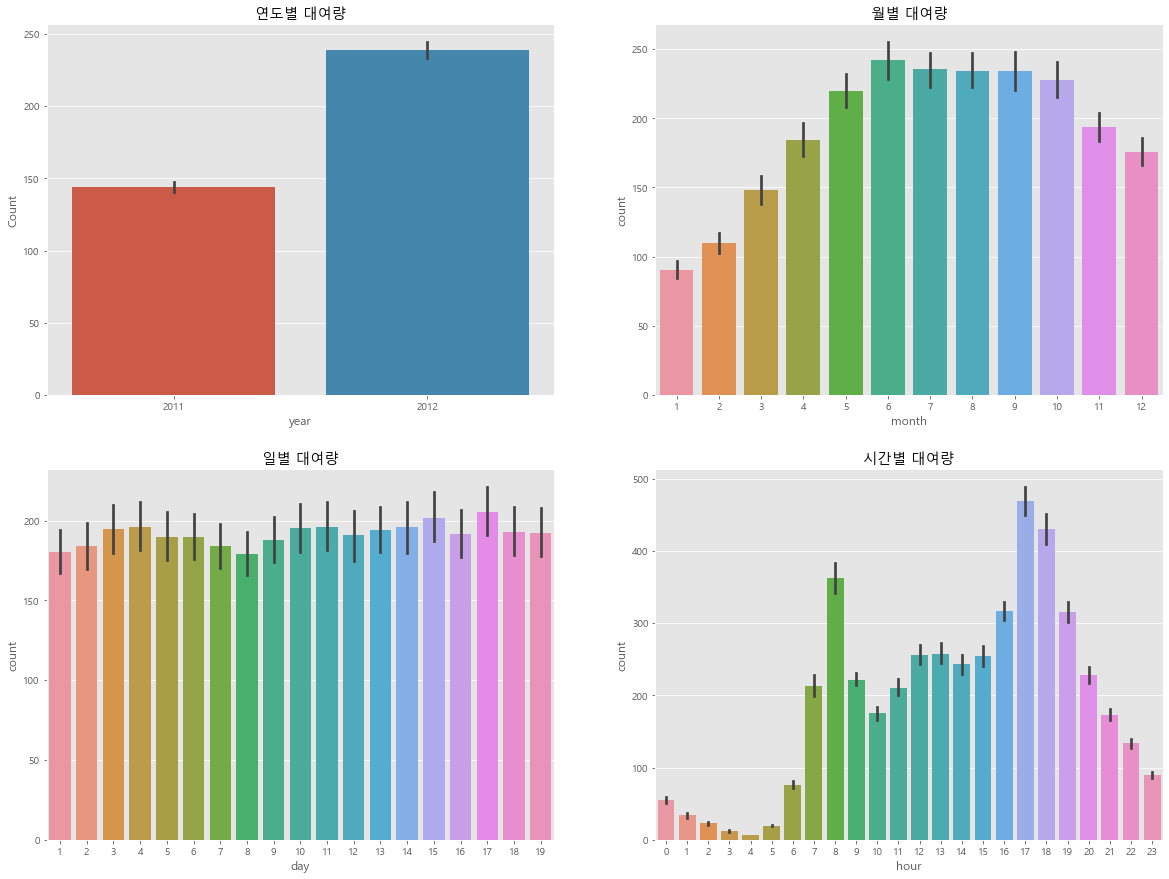

In [11]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(20, 15)

sns.barplot(data=train_df, x="year", y="count", ax=ax1)
sns.barplot(data=train_df, x="month", y="count", ax=ax2)
sns.barplot(data=train_df, x="day", y="count", ax=ax3)
sns.barplot(data=train_df, x="hour", y="count", ax=ax4)

ax1.set(ylabel='Count',title="연도별 대여량")
ax2.set(xlabel='month',title="월별 대여량")
ax3.set(xlabel='day', title="일별 대여량")
ax4.set(xlabel='hour', title="시간별 대여량")

In [12]:
train_df["day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19], dtype=int64)

* 연도 : 11년도 대비 12년도 대여량이 소폭 증가함
* 월별 : 날씨가 좋은 3월부터 대여량이 증가하며, 겨울을 맞이하여 대여량이 감소하는 것으로 관측됨 
* 일별 : 일별 대여량이 19일까지만 있어서 한참 확인하였으나, 19일이부터는 test데이터에 있는 것을 파악되었다. 이에 해당 데이터는 참고용으로만 사용하고자 한다. 
* 시간대 : 아침 출근시간과 퇴근시간에 사용량이 증가된 것으로 보아 출퇴근용으로 자전거를 사용하는 것이 아닌지 조심스럽게 추측해보고자 함 

### 2) weather 외 feature 분석 
이제 나머지 feature들과 count와의 상관관계를 예측해보고자 한다. 

[Text(0.5, 1.0, '시간대 / season별 대여량')]

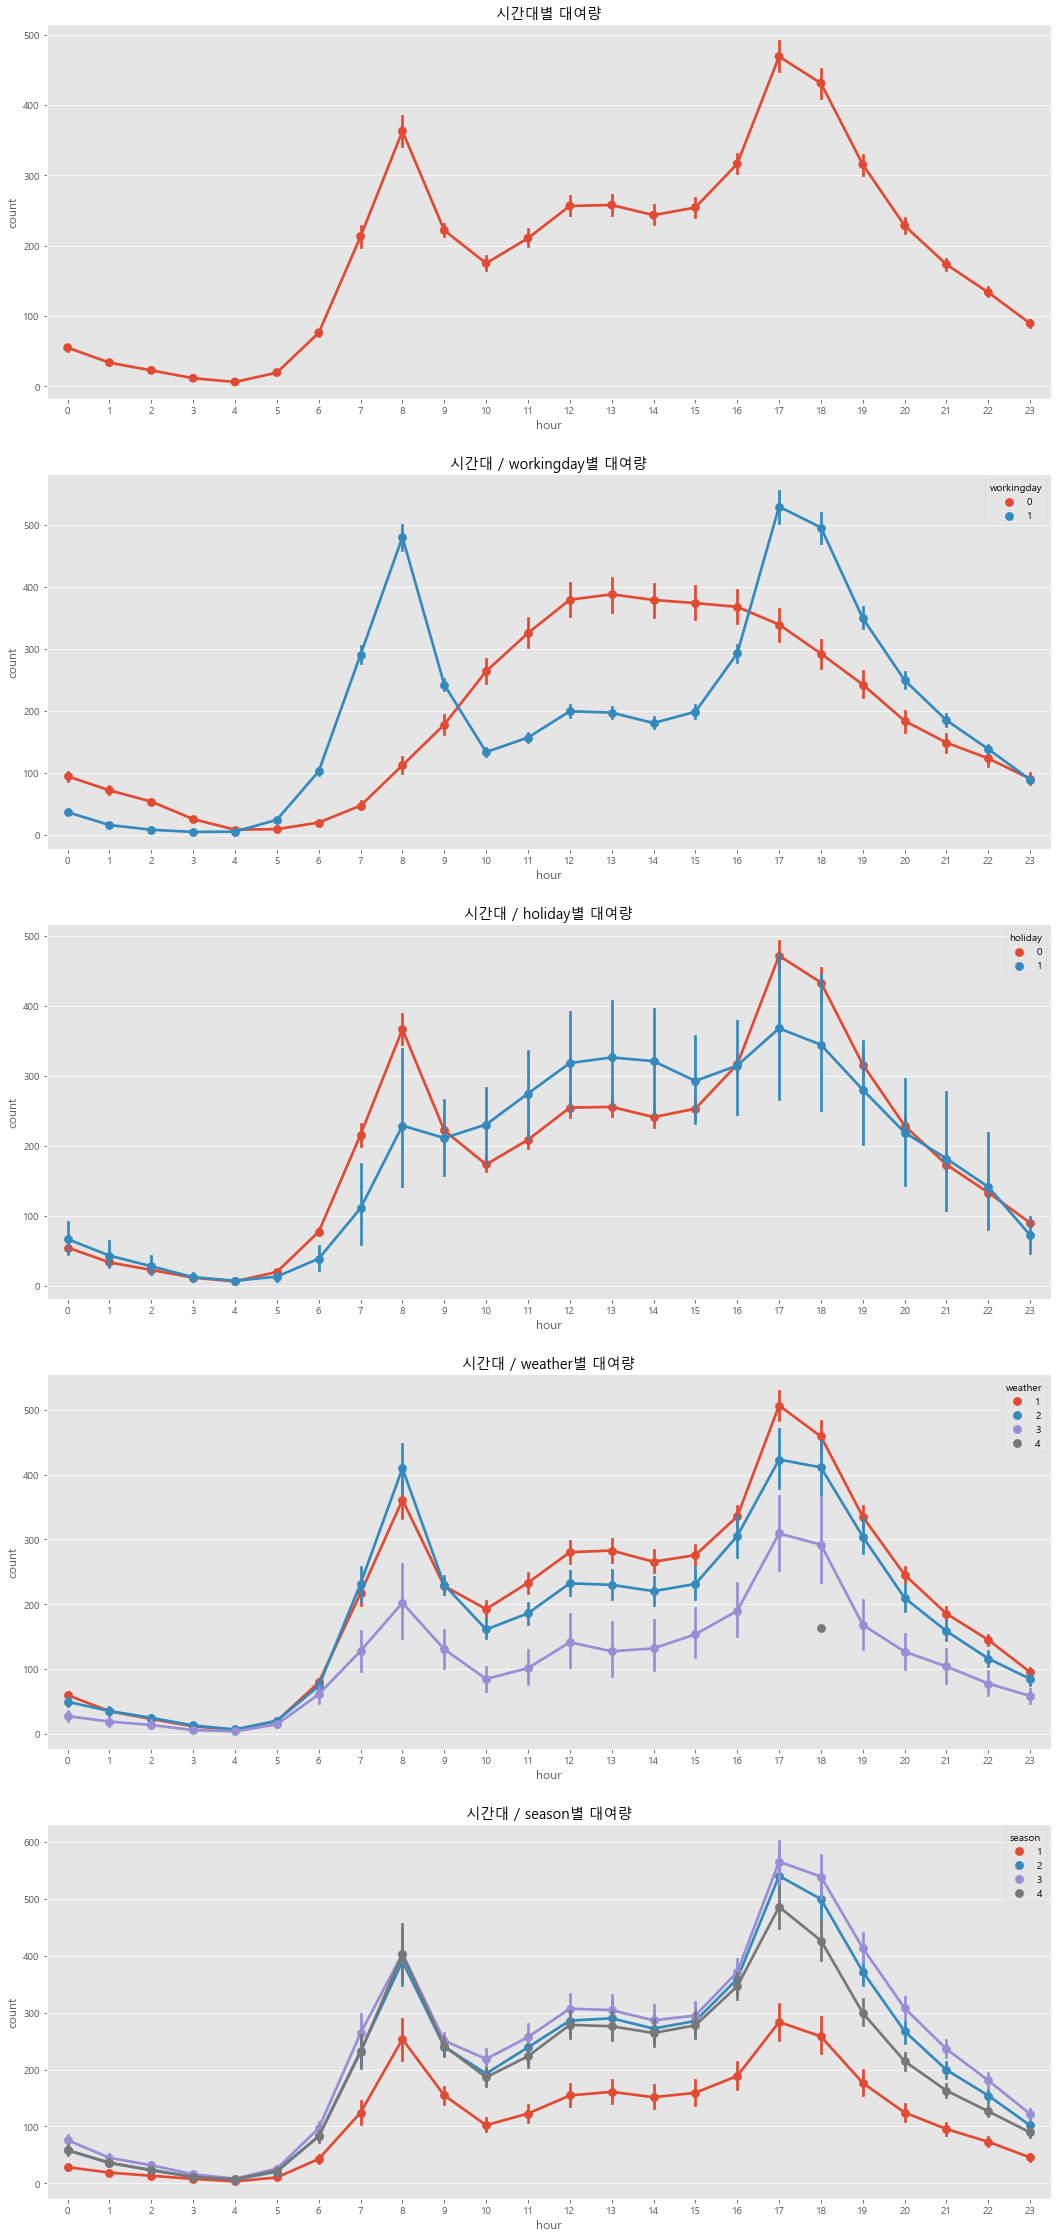

In [13]:
figure, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5)
figure.set_size_inches(18, 40)

sns.pointplot(data=train_df, x="hour", y="count", ax=ax1)
sns.pointplot(data=train_df, x="hour", y="count", ax=ax2, hue="workingday")
sns.pointplot(data=train_df, x="hour", y="count", ax=ax3, hue="holiday")
sns.pointplot(data=train_df, x="hour", y="count", ax=ax4, hue="weather")
sns.pointplot(data=train_df, x="hour", y="count", ax=ax5, hue="season")

ax1.set(title="시간대별 대여량")
ax2.set(title="시간대 / workingday별 대여량")
ax3.set(title="시간대 / holiday별 대여량")
ax4.set(title="시간대 / weather별 대여량")
ax5.set(title="시간대 / season별 대여량")

위 그래프를 분석한 결과, 
 1) 시간대별 단순 대여량을 보았을 때는 위에서도 언급한 바와 같이 출퇴근 시간에 이용을 많이하는 것으로 사료되나   
   
 2) 공유일에는 낮시간에도 많은 대여량이 관측된다. 이에, 단순히 출퇴근 시간에 사용량이 많다고만 정의하기에는 무리가 있는 것으로 관측된다.   
   
 3) workingday, holiday는 거의 유사한 그래프를 그리므로 둘다 feature로 사용할 필요성은 못느낀다. ( 일단, 둘 다 넣고 돌리되 문제가 있다면 제외할 예정 )   
   
 4) 날씨와 계절의 특징을 보았을 때는 날씨가 좋은 날/ 화장할때 더 많은 대여량이 관측이 된다. 이에, 이 두 feature는 대여량을 예측하는데 중요할 것으로 사료된다. 실제로도 날씨가 좋을 때 많은 사람들이 자전거를 사용하는 것을 관찰할 수 있다.   

In [14]:
# figure, (ax6, ax7, ax8) = plt.subplots(nrows=3)
# figure.set_size_inches(30, 30)

# sns.barplot(data=train_df, x="hour", y="count", ax=ax6, hue="temp")
# sns.barplot(data=train_df, x="hour", y="count", ax=ax7, hue="atemp")
# sns.barplot(data=train_df, x="hour", y="count", ax=ax8, hue="humidity")

temp, atemp, humidity 등도 pointplot으로 관측을 해보았으나,  
의미있는 그래프를 확인하기는 어려웠다.  
이에, COUNT와의 상관계수가 얼마나 되는지를 확인하고자 한다. 

<AxesSubplot:>

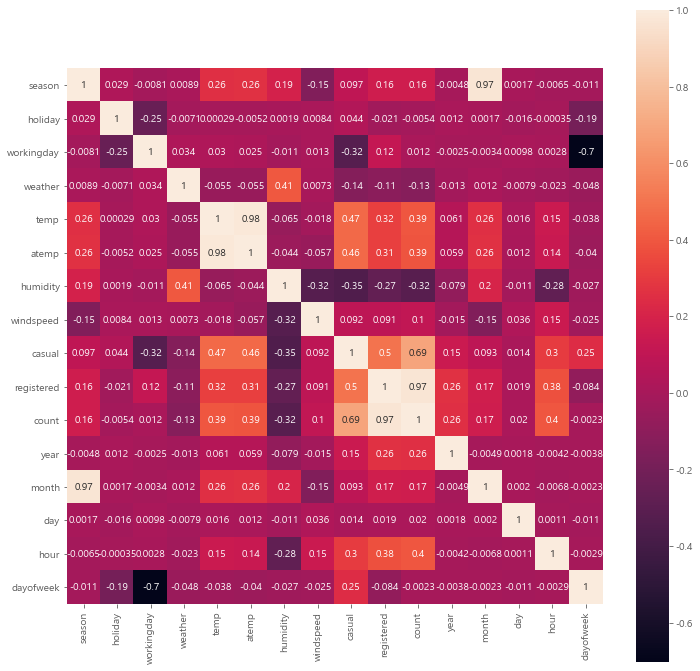

In [15]:
plt.figure(figsize=(12,12))
corr = train_df.corr()
sns.heatmap(corr, square=True, annot=True)

정말 이상한 상관관계가.. 많이 관측이 된다. 
 1) season - month : 0.97  
 2) workingday - dayofweek : -0.7  
 3) temp, atemp - register, casual : 0.32, 0.47 등   
 4) register, casual 과 count : 이들 관의 상관관계가 너무 높아 성능에 오류를 낼것으로 사료됨

### 4번 항목만 주의하여 학습을 시키면 될 듯하다. 
### 또한 위에서 확인하지 못한 온도&습도에 대한 타겟과의 관계는 특이점이 발견되지 않았다.
### 위에서도 언급한 바와 같이 temp, atemp를 굳이 두개다 사용할 필요가 없을 것으로 생각하였는데 역시 상관관계도 높게 관측되어 atemp는 제거하고 학습 시키고자 한다. ★


<AxesSubplot:xlabel='humidity', ylabel='count'>

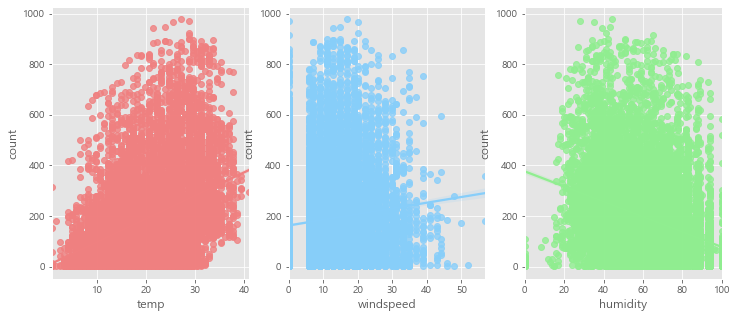

In [16]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sns.regplot(x="temp", y="count", data=train_df,ax=ax1, color="lightcoral")
sns.regplot(x="windspeed", y="count", data=train_df,ax=ax2, color="lightskyblue")
sns.regplot(x="humidity", y="count", data=train_df,ax=ax3, color="lightgreen")

windspeed 그래프를 보면 0에 데이터가 편중되어 있는 것을 볼 수 있다.  
이에, 아래와 같이 EDA를 진행하고자 한다. 

우리는 간단하게 심플 imputer를 통해서도 이를 치환할 수 있지만  
0을 대체하는 것에서도 머신러닝을 응용하여 값을 치환해주고자 한다. 
( 이렇게 하나하나 다 해주다보면 정말 EDA는 끝이 없을거 같긴 하다.. ) 

In [17]:
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    
    # 풍속이 0인것과 아닌 것을 나누어 줍니다. 
    dataWind0 = data.loc[data['windspeed'] == 0]
    dataWindNot0 = data.loc[data['windspeed'] != 0]
    
    # 풍속을 예측할 피처를 선택합니다.
    wCol = ["season", "weather", "humidity", "month", "temp", "year", "atemp", "day", "hour"]

    # 풍속이 0이 아닌 데이터들의 타입을 스트링으로 바꿔준다.
    dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str")

    # 랜덤포레스트 분류기를 사용한다.
    rfModel_wind = RandomForestClassifier()

    # wCol에 있는 피처의 값을 바탕으로 풍속을 학습시킨다.
    rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0["windspeed"])

    # 학습한 값을 바탕으로 풍속이 0으로 기록 된 데이터의 풍속을 예측하고자 합니다. 
    wind0Values = rfModel_wind.predict(X = dataWind0[wCol])

    # 값을 다 예측 후 비교해 보기 위해
    # 예측한 값을 넣어 줄 데이터 프레임을 새로 만든다.
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0

    # 값이 0으로 기록 된 풍속에 대해 예측한 값을 넣어준다.
    predictWind0["windspeed"] = wind0Values

    # dataWindNot0 0이 아닌 풍속이 있는 데이터프레임에 예측한 값이 있는 데이터프레임을 합쳐준다.
    data = predictWindNot0.append(predictWind0)

    # 풍속의 데이터타입을 float으로 지정해 준다.
    data["windspeed"] = data["windspeed"].astype("float")

    data.reset_index(inplace=True)
    data.drop('index', inplace=True, axis=1)
    
    return data

<ipython-input-17-fb818a21874f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataWindNot0["windspeed"] = dataWindNot0["windspeed"].astype("str")
<ipython-input-17-fb818a21874f>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predictWind0["windspeed"] = wind0Values


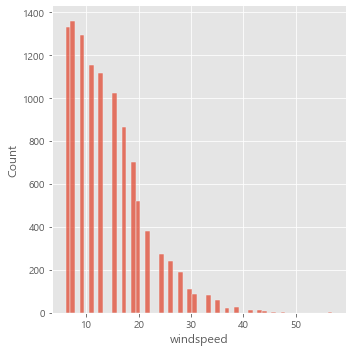

In [18]:
train_df = predict_windspeed(train_df)
sns.displot(train_df['windspeed']);

0을 예측하였으나, 그닥 결과는 마음에 들진 않지만, 그래도 이 방법이 SIMPEIMPUTER보다는 좋은 것 같아서 이 방법으로 진행하고자 한다. 

마지막으로 우리의 타켓의 데이터 편중 여부를 확인해볼 필요가 있다.   
데이터가 한쪽으로 치우져있다면 로그를 취해주어서 정규분포를 띌 수 있도록  
도와줄 필요가 있다

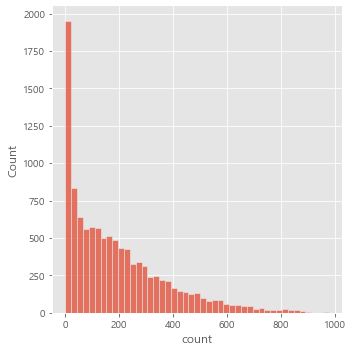

In [19]:
target = train_df['count']
sns.displot(target);

타겟의 분포를 보니 이상치도 있고, 데이터가 한쪽으로 치우쳐있는 것을 확인하였다.  
이에, 이상치를 일부 제거하고, 로그를 취해주고자 한다. 

혹시 몰라 다른 데이터들의 이상치도 처리할 줄 것이 있는지 확인하고자 한다.

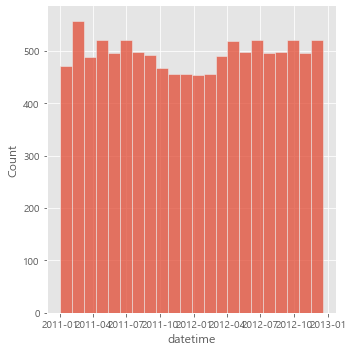

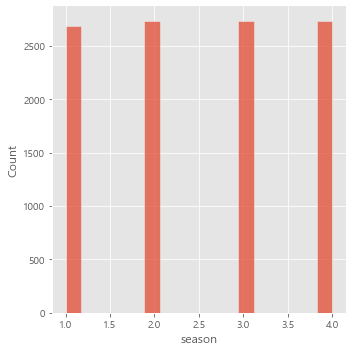

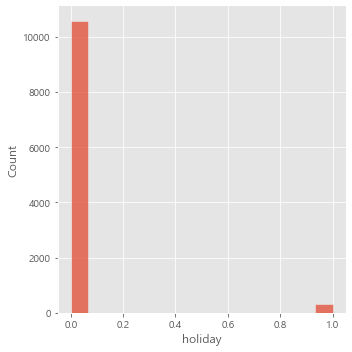

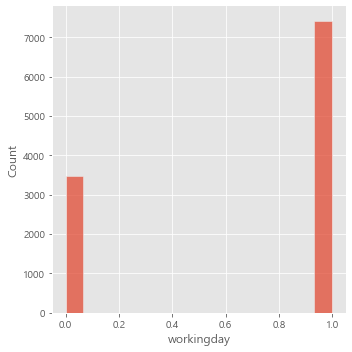

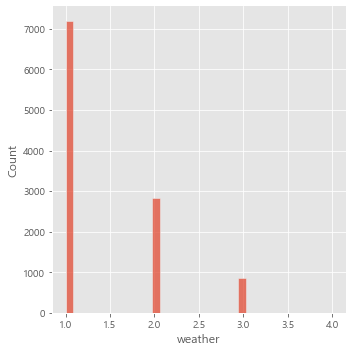

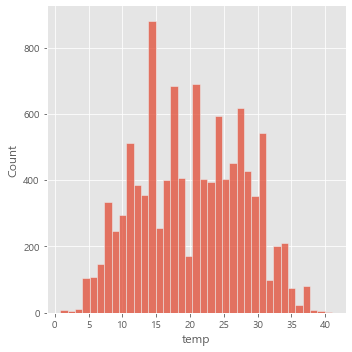

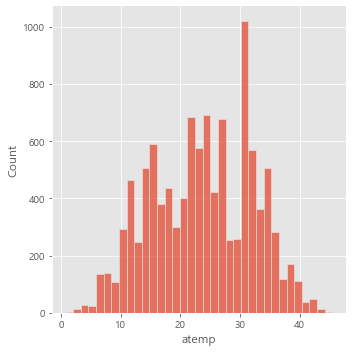

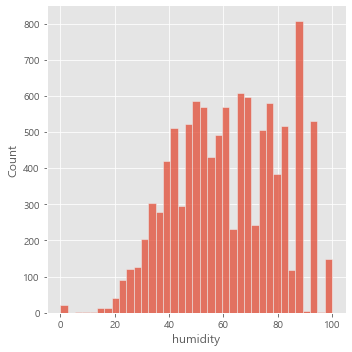

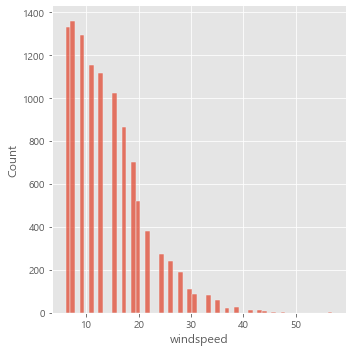

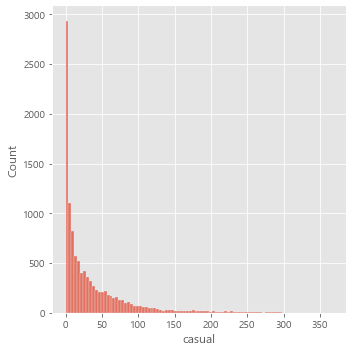

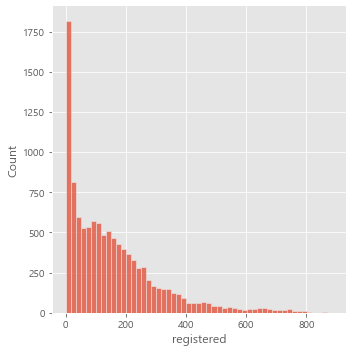

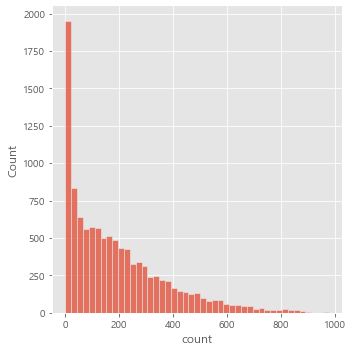

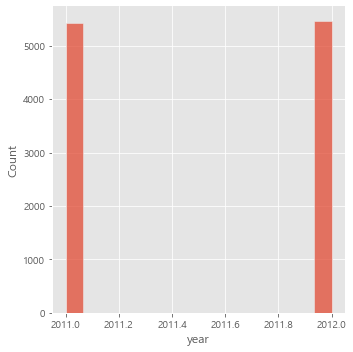

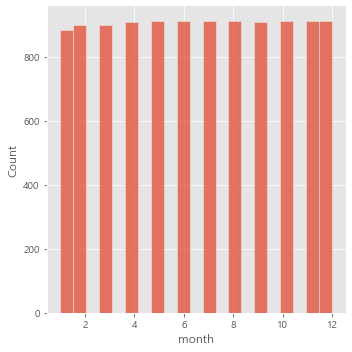

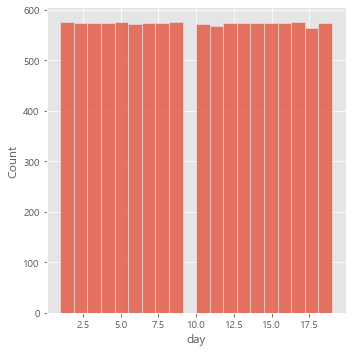

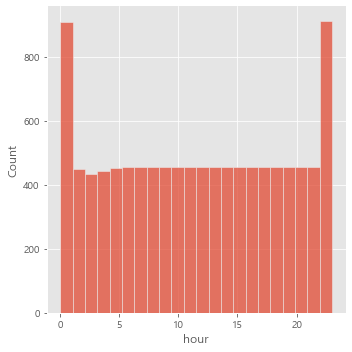

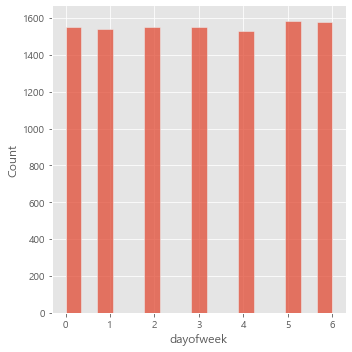

In [20]:
lists = train_df.columns
for list in lists :
    check_graph_outlier = train_df[list]
    sns.displot(check_graph_outlier);

count, windspeed, registered, casual를 제외하고는 큰 이상치가 관측되지 않는다.   
온도, 습도는 실제 관측치를 기재한 것이기에 이상치라고 보여지는 데이터를 손대지 않는다.  
  
그리고 count, windspeed는 원래 우리가 데이터를 처리해주기로 하였기에 그대로 진행하면 되고  registered, casual는 leak를 예상하는 데이터이므로 별도의 처리를 하지 않을 예정이다. ( 맨 마지막 해당 데이터를 포함하여 성능을 비교해보는 시간을 갖을 예정이다. ) 

In [21]:
trainWithoutOutliers = train_df[np.abs(train_df["count"] - train_df["count"].mean()) <= (3*train_df["count"].std())]

print(train_df.shape)
print(trainWithoutOutliers.shape)

(10886, 17)
(10739, 17)


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


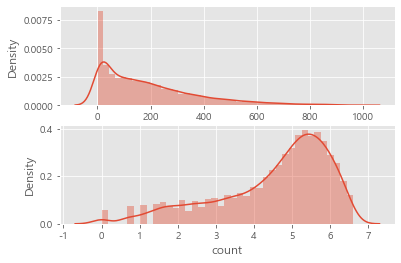

In [22]:
fig, ax = plt.subplots(2,1)
figure.set_size_inches(12, 10)

sns.distplot(train_df['count'],  ax=ax[0]);
sns.distplot(np.log(trainWithoutOutliers["count"]), ax=ax[1]);

로그로 데이터를 변환해주었을 때 훨씬 정규분포 형태를 띄는 모습을 확인할 수 있었다

In [23]:
feature_names = ["season", "weather", "temp", "atemp", "humidity", "windspeed",
                 "year", "hour", "dayofweek", "holiday", "workingday"]

feature_names

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'hour',
 'dayofweek',
 'holiday',
 'workingday']

In [24]:
X_train = train_df[feature_names]

print(X_train.shape)
X_train.head()

(10886, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,2,9.84,12.880,75,6.0032,2011,5,5,0,0
1,1,1,15.58,19.695,76,16.9979,2011,10,5,0,0
2,1,1,14.76,16.665,81,19.0012,2011,11,5,0,0
3,1,1,17.22,21.210,77,19.0012,2011,12,5,0,0
4,1,2,18.86,22.725,72,19.9995,2011,13,5,0,0


In [25]:
X_test = test_df[feature_names]

print(X_test.shape)
X_test.head()

(6493, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,26.0027,2011,0,5,0,1
1,1,1,10.66,13.635,56,0.0000,2011,1,5,0,1
2,1,1,10.66,13.635,56,0.0000,2011,2,5,0,1
3,1,1,10.66,12.880,56,11.0014,2011,3,5,0,1
4,1,1,10.66,12.880,56,11.0014,2011,4,5,0,1


전혀 다른 방식으로 테스트와 검증 데이터를 나누보았다.  
항상 다양한 방면으로 익숙해져야한다고 생각했다.  

In [26]:
X_train
y_train = train_df["count"]


from sklearn.model_selection import train_test_split
X_train, X_val = train_test_split(X_train, test_size=0.2, random_state=2)

In [27]:
len(y_train)

10886

In [28]:
y_train, y_val = train_test_split(y_train, test_size=0.2, random_state=2)

In [29]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((8708, 11), (2178, 11), (8708,), (2178,))

자전거 수요조사에서는 score를 rmsle이라는 스코어로 평가를 진행해야한다. 

RMSLE
과대평가 된 항목보다는 과소평가 된 항목에 패널티를 준다.

오차(Error)를 제곱(Square)해서 평균(Mean)한 값의 제곱근(Root) 으로 값이 작을 수록 정밀도가 높다.

0에 가까운 값이 나올 수록 정밀도가 높은 값이다.

Submissions are evaluated one the Root Mean Squared Logarithmic Error (RMSLE)

$$ \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 } $$

잔차(residual)에 대한 평균에 로그를 씌운 값이다. => 과대평가 된 항목보다 과소 평가 된 항목에 패널티를 주기위해

정답에 대한 오류를 숫자로 나타낸 값으로 값이 클 수록 오차가 크다는 의미다.
값이 작을 수록 오류가 적다는 의미를 나타낸다.

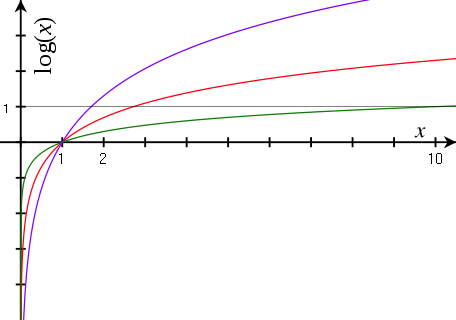

In [30]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    # 데이터프레임을 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    # 솔직히 이부분을 열심히 공부했는데 왜 더해주는지를 모르겠다..
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

교차결증을 적용하여 정밀도를 높이고자 한다. 

In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [32]:
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(),
    RandomForestRegressor(n_estimators=1000,
                          n_jobs=-1,
                          random_state=2)
)

tt = TransformedTargetRegressor(regressor=pipe,
                                func=np.log1p, inverse_func=np.expm1)

tt.fit(X_train, y_train)
score = cross_val_score(pipe, X_val, y_val, cv=k_fold, scoring=rmsle_scorer)
score.mean()

0.42121824256373397

In [33]:
score = cross_val_score(pipe, X_train, y_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()
score

0.3380840506154241

### score 관련 담당자 소견 
 1. 일단 낮을수록 좋은 성능을 내는 rmsle score로 평가를 진행하였다. 
 2. train 데이터에서 더 좋은 성능이 관측되었다. 
   * 개인적인 소견으로는 위에서는 과적합이 되지 않았나 추측해본다. 

### 자전거 관리담당자에게 전달해야할 사항

  1. 우리는 위 데이터를 근거로 
    * 평일은 출퇴근 시간에 자전거 이용이 많을 것으로 예측하였으며
    * 공휴일에는 아침 10시부터 18시까지 자전거 대여수요가 증가할 것으로 예측하였다.
    * 또한, 계절에 영향을 많이 받는 것을 예측하여 겨울철은 자전거 정비시간으로 계획하였으며, 
    * 전년도 대비 최소 평균 200건 이상은 증가할 것을 예측하였다. 
    
    * 이에, 우리는 서울시에서 제공하는 공공자전거 일별 대여건수를 가지고 
    맞게 예측하였는지 점검하고자 한다. 
    ( 자저건 대여소 위치, 일별 사용시간, 이동거리 등도 추가하고 싶었지만... 그렇지 못하였다. )

In [35]:
df = pd.read_csv(r"C:\Users\user\Documents\pandas_study\bootcamp_DS\section\section3\1day\서울시일별자전거대여건수.csv", encoding="UTF-8")

In [36]:
df.head(2)

,대여일시,대여건수
0,2019-12-01,"9,680"
1,2019-12-02,"34,397"


In [37]:
def remove_comma(x):
    return x.replace(',', '')

df['대여건수'] = df['대여건수'].apply(remove_comma)
df['대여건수'] = pd.to_numeric(df['대여건수'])
df['대여일시'] = pd.to_datetime(df['대여일시'])

In [38]:
df["year"] = df["대여일시"].dt.year
df["month"] = df["대여일시"].dt.month
df.head(2)

,대여일시,대여건수,year,month
0,2019-12-01,9680,2019,12
1,2019-12-02,34397,2019,12


In [39]:
df_month_sum = pd.DataFrame(df.groupby(["year", "month"])["대여건수"].sum())

<AxesSubplot:xlabel='year,month'>

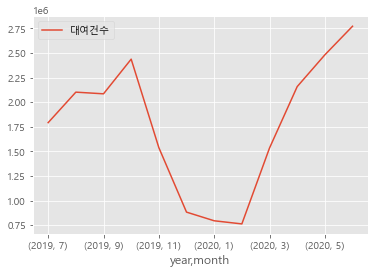

In [40]:
df_month_sum.plot()

<AxesSubplot:xlabel='year,month'>

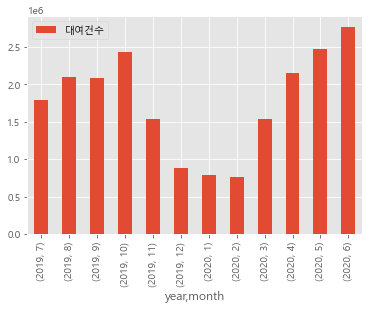

In [41]:
df_month_sum.plot(kind="bar")

위 그림에서 보시다시피 2019년 하반기에는 자전거 대여 수요가 증가하시다가  
코로나19라는 변수를 만나 대여량이 급감하는 경향을 보이며, 코로나19에 적응된  
시민분들께서 자전거 대여를 꾸준히 하고 있는 경향을 보이고 있습니다.  
  
본 시군도의 대기오염방지 및 국민건강증진 목적으로 실행된 자전거 대여 정책은 기존 예상대로 적합하게 시행되고 있음을 보고 드립니다.  

해당 내용에 대해 피드백 부탁드립니다.  
감사합니다.   

# 2DAY -2021.02.16

열심히 분석을 진행하였지만, 수정할 것이 많다는 피드백을 받았습니다.

실망한 DS.ltd 강다솔 대표는 오늘은 더 좋은 분석을 하기 위해 서울시에서 제공하는 공공자전거 이용정보(시간대별, 월별) 자료를 추가하여 분석하기로 하였습니다.

1) 위 분석한 데이터를 기반으로 연도별 사용률 예측하고   
2) 실제로 2017년, 2018년, 2019년 실제사용률을 분석합니다. 

3) 공공자전거 시간대별 데이터를 활용하여 실제 이용시간이 많으 타입을 확인하고자 합니다. 

In [43]:
df_rental_201812_201905 = pd.read_csv(r"C:\Users\user\Documents\pandas_study\bootcamp_DS\section\section3\2day\서울특별시 공공자전거 시간대별 대여정보_201812_201905(5).csv")
df_rental_time_201906_201911 = pd.read_csv(r"C:\Users\user\Documents\pandas_study\bootcamp_DS\section\section3\2day\서울특별시 공공자전거 이용정보(시간대별)_20190601_20191130(10).csv", encoding="UTF-8")
df_rental_201701_201712 = pd.read_csv(r"C:\Users\user\Documents\pandas_study\bootcamp_DS\section\section3\2day\서울특별시 공공자전거 이용정보(월별)_2017_1_12.csv", encoding="UTF-8")
df_rental_201801_201806 = pd.read_csv(r"C:\Users\user\Documents\pandas_study\bootcamp_DS\section\section3\2day\서울특별시 공공자전거 이용정보(월별)_2018_1_6.csv", encoding="UTF-8")
df_rental_201807_201812 = pd.read_csv(r"C:\Users\user\Documents\pandas_study\bootcamp_DS\section\section3\2day\서울특별시 공공자전거 이용정보(월별)_201807_201812.csv", encoding="UTF-8")
df_rental_201901_201906 = pd.read_csv(r"C:\Users\user\Documents\pandas_study\bootcamp_DS\section\section3\2day\서울특별시 공공자전거 이용정보(월별)_201901_201906.csv", encoding="UTF-8")
df_rental_201901_201911 = pd.read_csv(r"C:\Users\user\Documents\pandas_study\bootcamp_DS\section\section3\2day\서울특별시 공공자전거 이용정보(월별)_201907_201911.csv", encoding="UTF-8")
df_rental_201912 = pd.read_csv(r"C:\Users\user\Documents\pandas_study\bootcamp_DS\section\section3\2day\공공자전거 이용정보(월별)_19.12.csv", encoding="UTF-8")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb4 in position 0: invalid start byte